##Modelo de Atoll para tres neuronas

$$\dot{x}=5(1+cos x-\cos_{+}y+\sigma(t))$$

$$\dot{y}=0.04(1+cos y+\tanh(2\cos_{+}x-10L(t)))$$

$$\dot{z}=10(0.1+cos z-\cos_{+}y)$$

In [1]:
using PyPlot
using TaylorSeries
println(VERSION)

using Compat;

INFO: Loading help data...


0.3.11


In [2]:
function step{T<:Number}(x::Taylor1{T},eps::T)
    orden=length(x.coeffs)
    hs=Number[]
    for i in 1:orden #esto lo hacemos para evitar problemas con los coeficientes de Taylor que 
        #son cero
        if x.coeffs[i]!=0
            push!(hs,x.coeffs[i])
        end 
    end 
    orden=length(hs)
    p1=1/orden
    p2=1/(orden-1)
    den1=hs[orden]
    den2=hs[orden-1]
    h1=(abs(eps/den1))^p1
    h2=(abs(eps/den2))^p2
    h=min(h1,h2)
    #println(hs)

    return h
end 
    

step (generic function with 1 method)

In [3]:
function d{T<:Real}(x::Taylor1{T}) # La función pide un Taylor
    res=(x+((x^2)^0.5))/2.0
    return res
#end    
#function positive{T<:Number}(x::Taylor1{T})
#    obj=(x+(x^2)^0.5)/2
 #   return obj
end 

d (generic function with 1 method)

In [4]:
function tanh(x::Taylor1)
     ap1 = exp(2.0*(x))
    res1 = (ap1-1.0)/(ap1+1.0)
    return res1
end 

tanh (generic function with 1 method)

In [6]:
function xjetatoll3{T<:Number}(arr::Array{T,1},orden::Int,g::Function,σ::Number) #AQUI ESTÁ MI ERROR!!!! ENCONTRARLO!!
    xjet=zeros(orden)
    yjet=zeros(orden)
    zjet=zeros(orden)
    xjet[1]=arr[1] #cond. iniciales
    yjet[1]=arr[2]
    zjet[1]=arr[3]
    fx=zeros(orden)
    fy=zeros(orden)
    fz=zeros(orden)
    for k in 1:orden-1
        ax=Taylor1(xjet)
        ay=Taylor1(yjet)
        az=Taylor1(zjet)
        bx,by,bz=g(ax,ay,az,σ)
        fx[k]=bx.coeffs[k]
        fy[k]=by.coeffs[k]
        fz[k]=bz.coeffs[k]
        xjet[k+1]=fx[k]/(k)
        yjet[k+1]=fy[k]/(k)
        zjet[k+1]=fz[k]/k#OJO CON LA REALACION DE RECURRENCIA
    end 
    xaprox=Taylor1(xjet,orden)
    yaprox=Taylor1(yjet,orden)
    zaprox=Taylor1(zjet,orden)
    return xaprox,yaprox,zaprox
end 
    






xjetatoll3 (generic function with 1 method)

In [7]:
function integrate{T<:Number}(initial::Array{T,1},orden::Int,g::Function,tmax::T,eps::T)
    t=T[]#t=zeros(iter)
    xsolutions=T[]#xsolutions=zeros(iter)
    ysolutions=T[]#ysolutions=zeros(iter)
    zsolutions=T[]
    t0=initial[1]
    push!(t,initial[1])#t[1]=t0 #tiempo inicial
    push!(xsolutions,initial[2])# xsolutions[1]=x0
    push!(ysolutions,initial[3])  #ysolutions[1]=y0#condicion inicial
    push!(zsolutions,initial[4])
    #contador =0
    i=0
    σ=0.5
    while t0<tmax #for i in 1:iter-1
        i=i+1
        arregloaux=[xsolutions[i],ysolutions[i],zsolutions[i]]
        xaprox,yaprox,zaprox=xjetatoll3(arregloaux,orden,g,σ)
        #h1,h2,h3=step(xaprox),step(yaprox),step(zaprox)
        h=step(xaprox,eps)#h=min(h1,h2,h3)#println(h)
     #   contador=contador+h
        t0=t0+h#t[i+1]=t[i]+h
        xaux=evaluate(xaprox,h)
        yaux=evaluate(yaprox,h)
        zaux=evaluate(zaprox,h)
        
        push!(t,t0)
        push!(xsolutions,xaux) # xsolutions[i+1]=evaluate(xaprox,h)
        push!(ysolutions,yaux) # ysolutions[i+1]=evaluate(yaprox,h)
        push!(zsolutions,zaux)
        
    end 
    #println("h total es ",contador)
    return t,xsolutions,ysolutions,zsolutions
end ;

In [18]:
function graficar{T<:Number}(arreglo::Array{T,1},orden::Int,g::Function,tmax::T,eps::T)
    tatoll,xatoll,yatoll,zatoll=integrate(arreglo,orden,g,tmax,eps)
    n=length(tatoll)
    cx=cos(xatoll)
    cy=cos(yatoll)
    cz=cos(zatoll)
    cosx,cosy,cosz=zeros(n),zeros(n),zeros(n) #graficaremos la parte positiva
    [cosx[i]=(cx[i]+(cx[i]^2)^0.5)/2 for i in 1:n]
    [cosy[i]=(cy[i]+(cy[i]^2)^0.5)/2+1 for i in 1:n]
    [cosz[i]=(cz[i]+(cz[i]^2)^0.5)/2+2 for i in 1:n]
    #cosx=cos(xatoll)
    #cosy=cos(yatoll)+2
    #cosz=cos(zatoll)+4;
    plot(tatoll,cosx)
    plot(tatoll,cosy)
    plot(tatoll,cosz)
        xlim([0,tmax])
        title(L"Potenciales \ de \ accion")
        xlabel(L"t",size=20);
end 

graficar (generic function with 1 method)

In [19]:
function atoll3(x::Taylor1,y::Taylor1,z::Taylor1,σ::Number)
    f1=5.0*(1+σ+cos(x)-cos(y))
    f2=0.04*(1+cos(y)+tanh(2*cos(x)-10*cos(y)))
    f3=10.0*(0.1+cos(z+1.0)-cos(y))
    return f1,f2,f3
end 

atoll3 (generic function with 1 method)

In [20]:
function atollpositive3(x::Taylor1,y::Taylor1,z::Taylor1,σ::Number)
      Lyi = d(cos(y))
        Dx1 = 5.0*(1.0+cos(x)-d(cos(y))+σ)
        Dy1 = 0.04*(1.0+cos(y)+tanh(2.0*d(cos(x)-10.0*Lyi)))
        Dz1 = 10.0*(0.1+cos(z)-d(cos(y)))
    #f1=5.0*(1+σ+cos(x)-positive(cos(y)))
    #f2=0.04*(1+cos(y)+tanh(2*positive(cos(x))-10*positive(cos(y))))
    #f3=10.0*(0.1+cos(z)-positive(cos(y)))
    return Dx1,Dy1,Dz1#f1,f2,f3
    
end 

atollpositive3 (generic function with 1 method)

In [21]:
function atollpositive3_1(x::Taylor1,y::Taylor1,z::Taylor1,σ::Number)
      Lyi = d(cos(y+0.9))
        Dx1 = 5.0*(1.0+cos(x)-d(cos(y))+σ)
        Dy1 = 0.04*(1.0+cos(y)+tanh(2.0*d(cos(x+0.5)-10.0*Lyi)))
        Dz1 = 10.0*(0.1+cos(z)-d(cos(y+6.0)))
    #f1=5.0*(1+σ+cos(x)-positive(cos(y)))
    #f2=0.04*(1+cos(y)+tanh(2*positive(cos(x))-10*positive(cos(y))))
    #f3=10.0*(0.1+cos(z)-positive(cos(y)))
    return Dx1,Dy1,Dz1#f1,f2,f3
    
end 

atollpositive3_1 (generic function with 1 method)

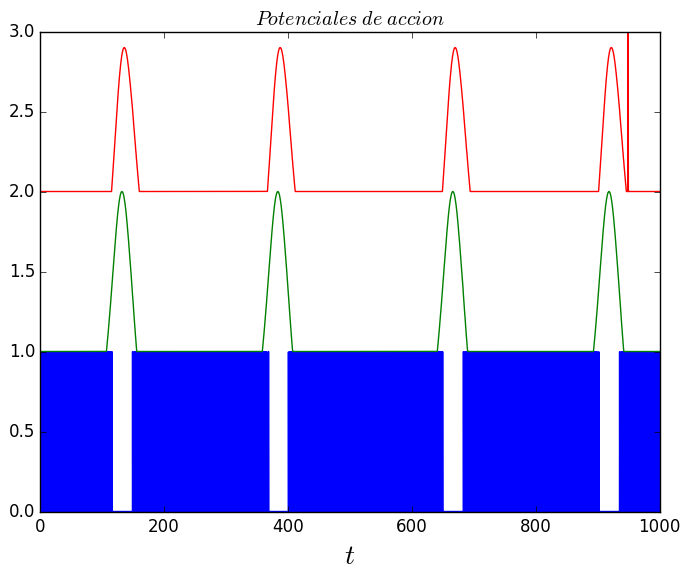

In [22]:
condiciones_iniciales=[0.0,-π,-π,-π] #decente en cuanto a tiempo y visualizacion 
graficar(condiciones_iniciales,13,atollpositive3_1,1000.0,1e-15);

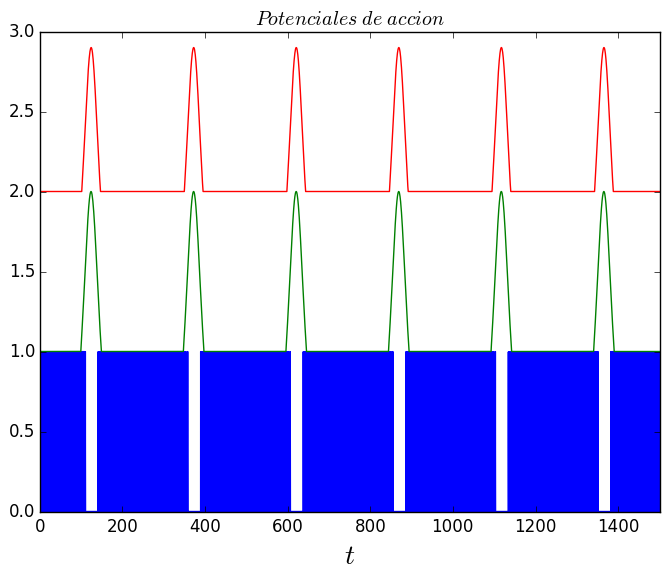

In [23]:
condiciones_iniciales=[0.0,-π,-π,-π] #decente en cuanto a tiempo y visualizacion 
graficar(condiciones_iniciales,13,atollpositive3,1500.0,1e-15);

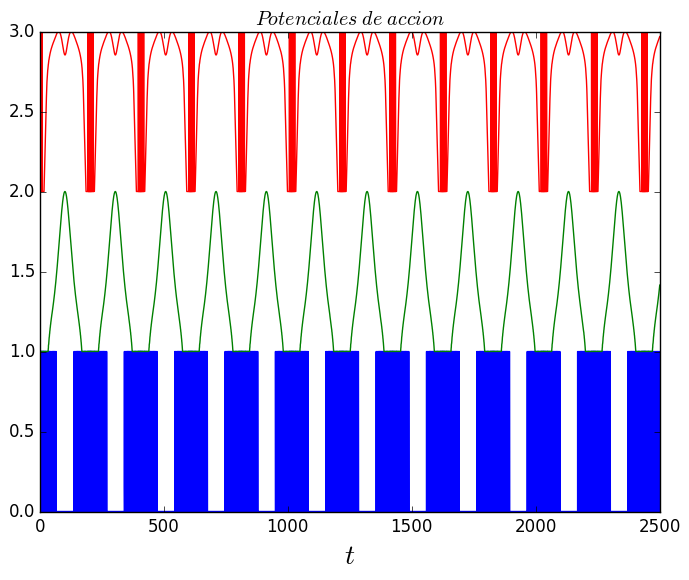

In [24]:
condiciones_iniciales=[0.0,-π,-π,-π] #bonito y medio rapido, no tan rapido pero mas rapido que la primera grafica y se ve casi igual 
graficar(condiciones_iniciales,10,atoll3,2500.0,1e-15);

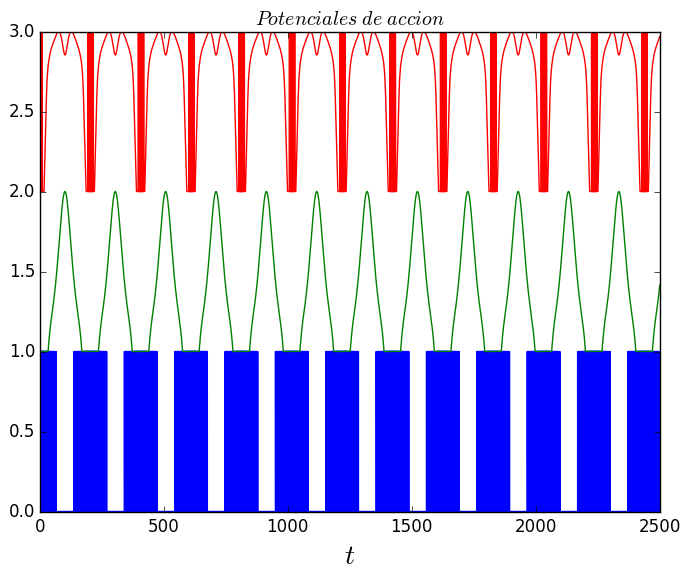

In [25]:
condiciones_iniciales=[0.0,-π,-π,-π] #bonito pero algo tardado
graficar(condiciones_iniciales,10,atoll3,2500.0,1e-20);

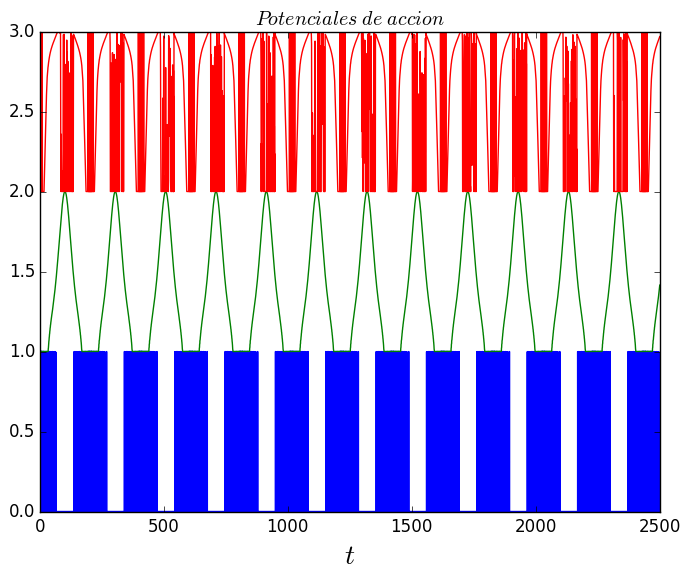

In [26]:
condiciones_iniciales=[0.0,-π,-π,-π] #caotico no tan tardado
graficar(condiciones_iniciales,10,atoll3,2500.0,1e-10);

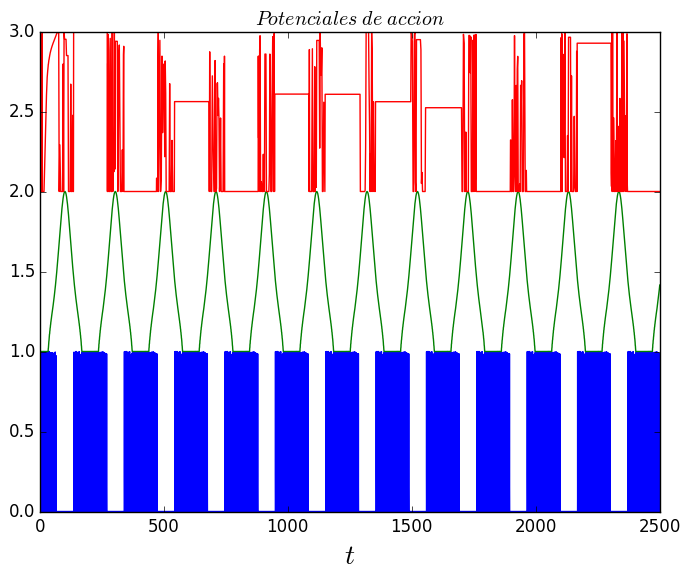

In [27]:
condiciones_iniciales=[0.0,-π,-π,-π]
graficar(condiciones_iniciales,20,atoll3,2500.0,1e-10);

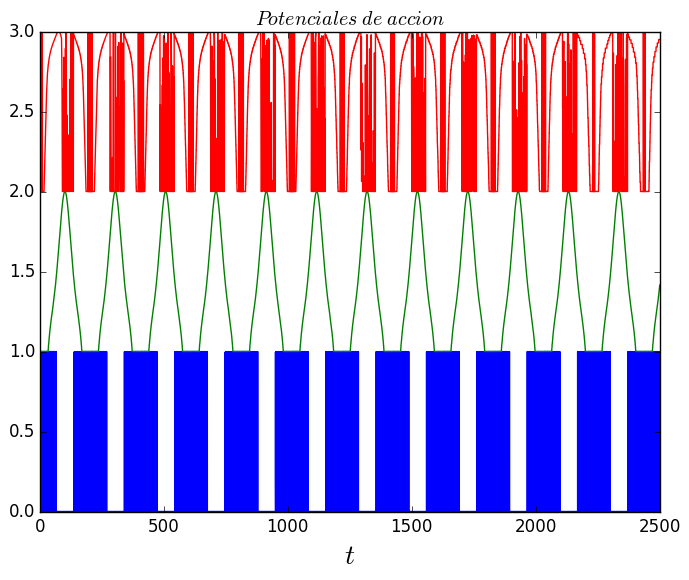

In [28]:
condiciones_iniciales=[0.0,-π,-π,-π]
graficar(condiciones_iniciales,15,atoll3,2500.0,1e-15);

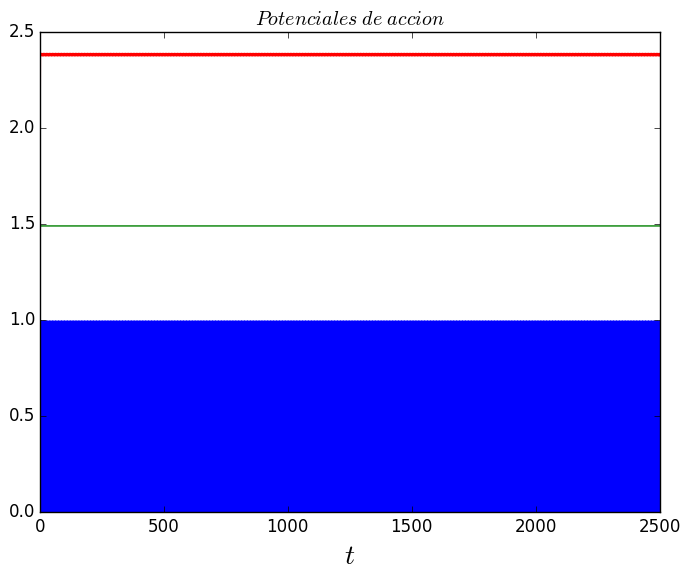

In [29]:
condiciones_iniciales=[0.0,-π,-π,-π] #muy rapido pero horrible visualmente
graficar(condiciones_iniciales,25,atollpositive3,2500.0,1e-20);

In [ ]:
condiciones_iniciales=[0.0,-π,-π,-π] #tardo infinito
graficar(condiciones_iniciales,,atollpositive3,2500.0,1e-15);

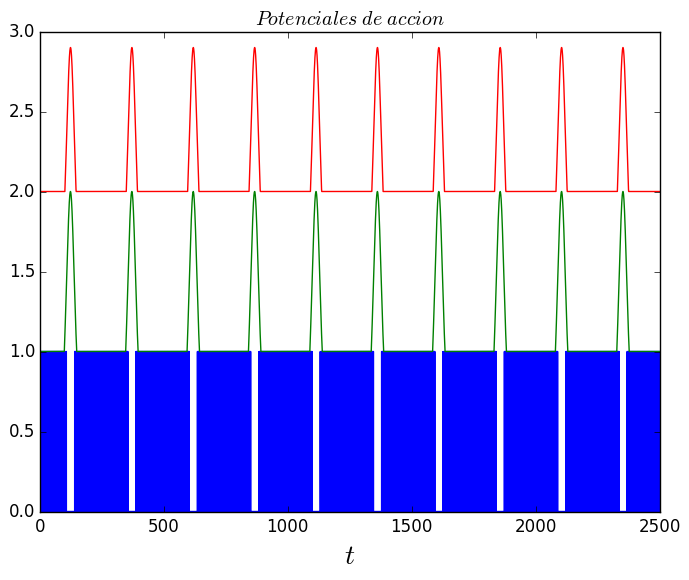

In [30]:
condiciones_iniciales=[0.0,-π,-π,-π] #muy rapido y hermoso
graficar(condiciones_iniciales,10,atollpositive3,2500.0,1e-15);

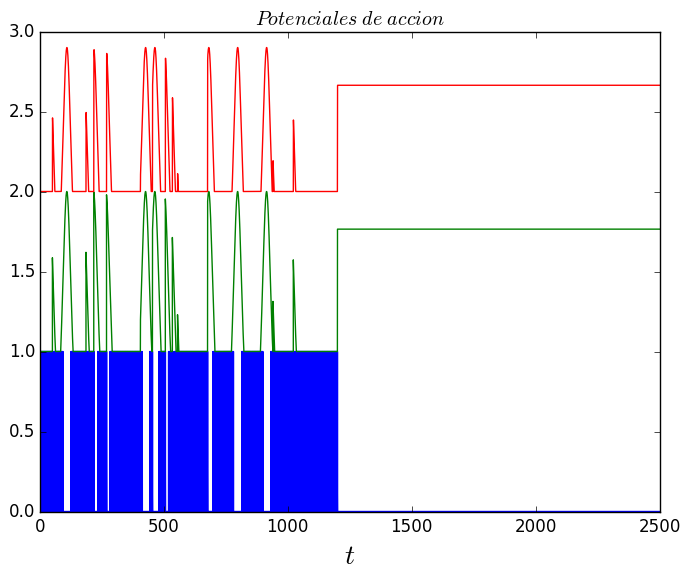

In [31]:

condiciones_iniciales=[0.0,-π,-π,-π] #algo tardado y me escupe burlandose de mi en la cara
graficar(condiciones_iniciales,13,atollpositive3,2500.0,1e-20);

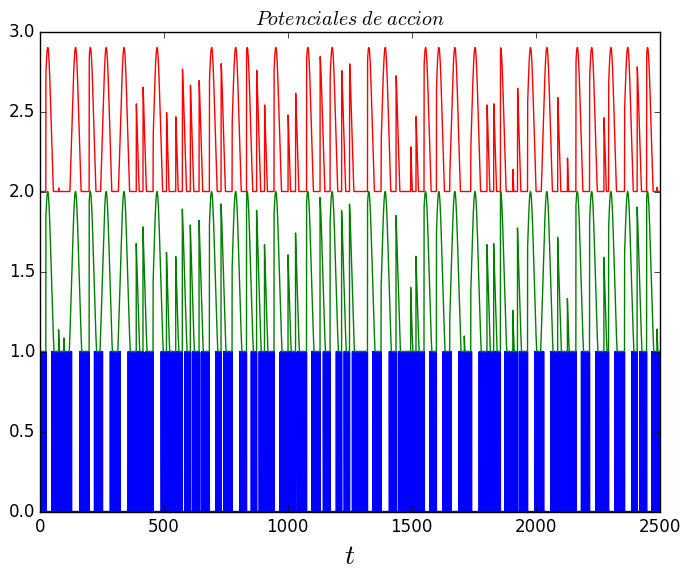

In [32]:
condiciones_iniciales=[0.0,-π,-π,-π] # rapido y crazy
graficar(condiciones_iniciales,15,atollpositive3,2500.0,1e-15);